In [1]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
DATASET_PATH = "/kaggle/input/spacenet-an-optimally-distributed-astronomy-data"
folders = os.listdir(DATASET_PATH)
folders
path=os.path.join(DATASET_PATH,folders[0])
classes=os.listdir(path)
classes

['planet',
 'galaxy',
 'black hole',
 'asteroid',
 'comet',
 'star',
 'constellation',
 'nebula']

In [2]:
images = {}
for cls in classes:
    cls_path = os.path.join(path, cls)
    images[cls] = len(os.listdir(cls_path))
images


{'planet': 1472,
 'galaxy': 3984,
 'black hole': 656,
 'asteroid': 283,
 'comet': 416,
 'star': 3269,
 'constellation': 1552,
 'nebula': 1192}

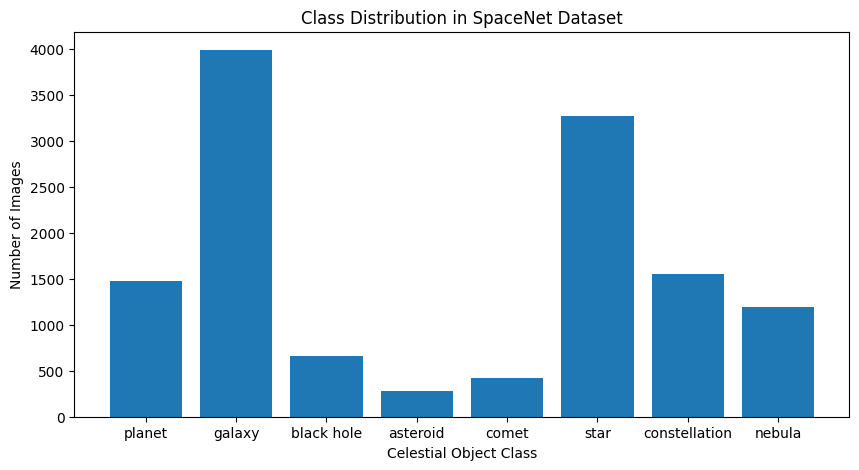

In [3]:
plt.figure(figsize=(10,5))
plt.bar(images.keys(),images.values())
plt.xlabel("Celestial Object Class")
plt.ylabel("Number of Images")
plt.title("Class Distribution in SpaceNet Dataset")
plt.show()

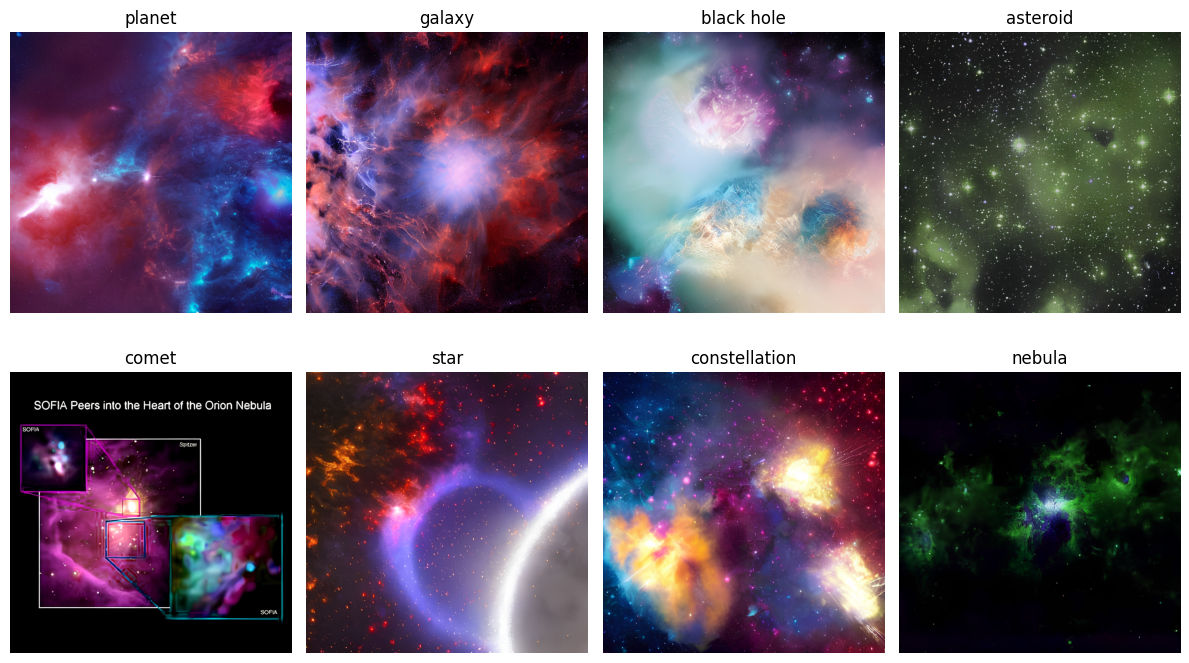

In [4]:
plt.figure(figsize=(12,8))
for i, cls in enumerate(classes): 
    img_name=random.choice(os.listdir(cls_path))
    img_path=os.path.join(cls_path,img_name)
    img=Image.open(img_path)
    plt.subplot(2,4,i+1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis("off")
    plt.tight_layout()
    plt.show

In [5]:
images_sizes=[]
images_modes=[]
for cls in classes:
    sample_img=os.listdir(cls_path)[0]
    img=Image.open(os.path.join(cls_path,sample_img))
    images_sizes.append(img.size)
    images_modes.append(img.mode)
images_sizes,set(images_modes)
    

([(2048, 2048),
  (2048, 2048),
  (2048, 2048),
  (2048, 2048),
  (2048, 2048),
  (2048, 2048),
  (2048, 2048),
  (2048, 2048)],
 {'RGB'})

## Dataset Split: Train / Test / Eval

In [6]:
import os
import shutil
import random
source="/kaggle/input/spacenet-an-optimally-distributed-astronomy-data/SpaceNet.FLARE.imam_alam"
target="/kaggle/working/dataset"
classes=os.listdir(source)
classes
train_ratio=0.7
test_ratio=0.15
eval_ratio=0.15
for cls in classes:
    cls_path=os.path.join(source,cls)
    images=os.listdir(cls_path)
    random.shuffle(images)
    total=len(images)
    train_end=int(train_ratio*total)
    test_end=train_end+int(test_ratio*total)
    for split in ["train", "test", "eval"]:
        os.makedirs(os.path.join(target, split, cls), exist_ok=True)
    print(
        f"{cls}: total={total}, "
        f"train={train_end}, "
        f"test={test_end - train_end}, "
        f"eval={total - test_end}"
    )



    

planet: total=1472, train=1030, test=220, eval=222
galaxy: total=3984, train=2788, test=597, eval=599
black hole: total=656, train=459, test=98, eval=99
asteroid: total=283, train=198, test=42, eval=43
comet: total=416, train=291, test=62, eval=63
star: total=3269, train=2288, test=490, eval=491
constellation: total=1552, train=1086, test=232, eval=234
nebula: total=1192, train=834, test=178, eval=180
